In [2]:
import pandas as pd

file_path = 'Digital_Music_5.json'
df = pd.read_json(file_path, lines=True)
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,3.0,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4,3.0,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169776,5,NaN,True,"08 19, 2018",A1SR2T84IXOMAQ,B01HJ91MTW,{'Format:': ' MP3 Music'},Diane B.,Casting Crowns songs are all wonderful!!,Great song!!,1534636800,NaN
169777,5,NaN,True,"03 18, 2018",A2SR3DWJR1PYR6,B01HJ91MTW,{'Format:': ' MP3 Music'},jan c.,Just reminds you that you are never alone.,Five Stars,1521331200,NaN
169778,5,NaN,True,"03 7, 2018",A24V7X30NIMOIY,B01HJ91MTW,{'Format:': ' MP3 Music'},Lori Y,"Good product, good service.",Five Stars,1520380800,NaN
169779,5,NaN,True,"02 12, 2018",A1LW10GYP2EYM1,B01HJ91MTW,{'Format:': ' MP3 Music'},N F,I love every single song this group sings. The...,Absolutely beautiful...,1518393600,NaN


In [102]:
df['reviewText'].iloc[3]

"well best of's are a bit poison normally but this is not bad it's pretty good because I'd have put 90% hell await,reign in blood,south of,seasons ,divine and a couple musica's tracks and everything on god hates -at that point best of mean every cd mainly so this is not so bad  it dose put some great tracks that live shows don't play much out there like,213, skeletons of society,sex murder art and Gemini and some rare track too,final six is just a bonus track on Christ illusion but it's here with the mystery cover songs from unditstputed attitude cd(why these would be on a greatest hits collection I don't know) but the also put a couple of live tracks on here too.all in all it could be much worse but it's great for the car."

In [95]:
from datetime import datetime

def extract_year(date_string):
    date_object = datetime.strptime(date_string, "%m %d, %Y")
    return date_object.year

In [97]:
df['reviewTime'].apply(lambda x: extract_year(x)).value_counts()

reviewTime
2015    40718
2014    38901
2016    29431
2013    28246
2017    12404
2012     8554
2018     4482
2011     1639
2010     1374
2008     1100
2009     1038
2007      403
2005      285
2003      273
2004      272
2006      225
2002      198
2001      126
2000       98
1999        9
1998        5
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169781 entries, 0 to 169780
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         169781 non-null  int64  
 1   vote            7611 non-null    float64
 2   verified        169781 non-null  bool   
 3   reviewTime      169781 non-null  object 
 4   reviewerID      169781 non-null  object 
 5   asin            169781 non-null  object 
 6   style           157989 non-null  object 
 7   reviewerName    169776 non-null  object 
 8   reviewText      169623 non-null  object 
 9   summary         169745 non-null  object 
 10  unixReviewTime  169781 non-null  int64  
 11  image           182 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 14.4+ MB


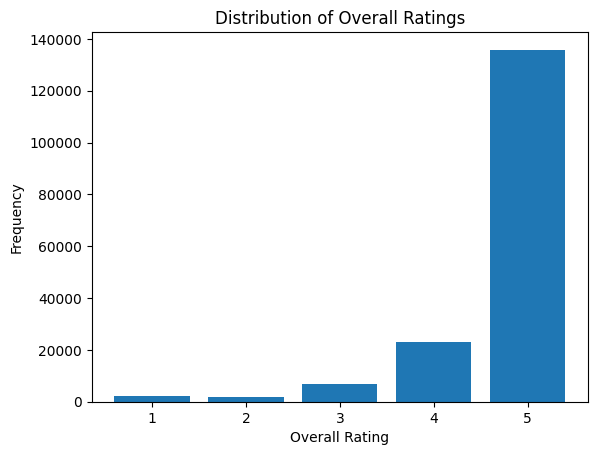

In [5]:
import matplotlib.pyplot as plt

rating_counts = df['overall'].value_counts()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.show()

### SVD

In [57]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import GridSearchCV
import time

# Start the timer
start_time = time.time()

file_path = 'Digital_Music_5.json'
df = pd.read_json(file_path, lines=True)

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

param_grid = {'n_epochs': [10, 15, 20], 'lr_all': [0.015, 0.02, 0.023], 'n_factors': [40, 50, 60],
              'reg_all': [0.03, 0.02, 0.01]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

gs.fit(data)


best_params = gs.best_params['rmse']

print("Best Parameters:", best_params)

best_svd_model = SVD(n_epochs=best_params['n_epochs'], n_factors=best_params['n_factors'],
                     lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

best_svd_model.fit(trainset)

train_predictions = best_svd_model.test(trainset.build_testset())
test_prediction = best_svd_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)
test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)


# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Best Parameters: {'n_epochs': 20, 'lr_all': 0.023, 'n_factors': 60, 'reg_all': 0.03}
RMSE: 0.3686
RMSE: 0.5258
Train RMSE with Tuned Model: 0.36859634279899656
Test RMSE with Tuned Model: 0.5258233959287231
Elapsed time: 178.30544900894165 seconds


In [84]:
# Start the timer
start_time = time.time()

model = SVD(n_epochs=20, lr_all=0.023, reg_all=0.025, n_factors=70)

model.fit(trainset)

train_predictions = model.test(trainset.build_testset())
test_prediction = model.test(testset)

train_rmse = accuracy.rmse(train_prediction)
test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)


# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

RMSE: 0.2700
RMSE: 0.5273
Train RMSE with Tuned Model: 0.2699884862980933
Test RMSE with Tuned Model: 0.5273334208462045
Elapsed time: 1.891528844833374 seconds


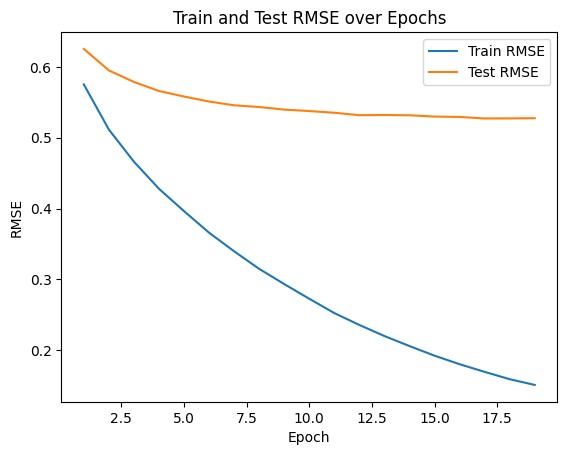

In [56]:
import matplotlib.pyplot as plt

train_rmse_values = []
test_rmse_values = []

for epoch in range(1, 20):
    model = SVD(n_epochs=epoch, lr_all=0.023, n_factors= 80, reg_all=0.02, verbose=False)
    model.fit(trainset)
    
    train_predictions = model.test(trainset.build_testset())
    train_rmse = accuracy.rmse(train_predictions, verbose=False)
    train_rmse_values.append(train_rmse)
    
    test_predictions = model.test(testset)
    test_rmse = accuracy.rmse(test_predictions, verbose=False)
    test_rmse_values.append(test_rmse)
    
epochs = range(1, model.n_epochs + 1)
plt.plot(epochs, train_rmse_values, label='Train RMSE')
plt.plot(epochs, test_rmse_values, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE over Epochs')
plt.legend()
plt.show()

### KNNBaseline

In [60]:
from surprise import KNNBaseline

# Start the timer
start_time = time.time()

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [0.01, 0.02, 0.025]},
              'sim_options': {'name': ['cosine', 'msd', 'pearson'],
                              'user_based': [False]},
              'n_epochs': [3, 5, 10],
              'k': [30, 40, 50],
              'verbose': [False]}

gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

best_params = gs.best_params['rmse']

print("Best Parameters:", best_params)

best_knn_baseline_model = KNNBaseline(bsl_options=best_params['bsl_options'],
                                      sim_options=best_params['sim_options'],
                                      n_epochs=best_params['n_epochs'],
                                      k=best_params['k'],
                                      verbose=False)

best_knn_baseline_model.fit(trainset)

train_predictions = best_knn_baseline_model.test(trainset.build_testset())
test_predictions = best_knn_baseline_model.test(testset)

train_rmse = accuracy.rmse(train_predictions)
test_rmse = accuracy.rmse(test_predictions)

print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Best Parameters: {'bsl_options': {'method': 'sgd', 'reg': 0.01}, 'sim_options': {'name': 'pearson', 'user_based': False}, 'n_epochs': 3, 'k': 50, 'verbose': False}
RMSE: 0.1532
RMSE: 0.5266
Train RMSE with Tuned Model: 0.1532184870516745
Test RMSE with Tuned Model: 0.5266308940670003
Elapsed time: 1970.8421881198883 seconds


In [90]:
model = KNNBaseline(bsl_options={'method': 'sgd', 'reg': 0.01},
                                      sim_options={'name': 'pearson', 'user_based': False},
                                      n_epochs=3,
                                      k=50,
                                      verbose=False)

model.fit(trainset)

train_predictions = model.test(trainset.build_testset())
test_predictions = model.test(testset)

train_rmse = accuracy.rmse(train_predictions)
test_rmse = accuracy.rmse(test_predictions)

print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

RMSE: 0.1532
RMSE: 0.5266
Train RMSE with Tuned Model: 0.1532184870516745
Test RMSE with Tuned Model: 0.5266308940670003
Elapsed time: 137.3296070098877 seconds


### SVD++ Model

In [58]:
from surprise import SVDpp

# Start the timer
start_time = time.time()

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.015, 0.02, 0.025], 'n_factors': [40, 50, 60],
              'reg_all': [0.03, 0.025, 0.02]}

gs = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=3)

gs.fit(data)


best_params = gs.best_params['rmse']

print("Best Parameters:", best_params)

best_svd_pp_model = SVDpp(n_epochs=best_params['n_epochs'], n_factors=best_params['n_factors'],
                     lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

# best_svd_pp_model = gs
best_svd_pp_model.fit(trainset)

train_prediction = best_svd_pp_model.test(trainset.build_testset())

test_prediction = best_svd_pp_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)

test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Best Parameters: {'n_epochs': 15, 'lr_all': 0.025, 'n_factors': 50, 'reg_all': 0.03}
RMSE: 0.2700
RMSE: 0.5315
Train RMSE with Tuned Model: 0.2699884862980933
Test RMSE with Tuned Model: 0.5315374175400348
Elapsed time: 525.6468322277069 seconds


In [89]:
# Start the timer
start_time = time.time()

model = SVDpp(n_epochs=15, lr_all=0.02, reg_all=0.02, n_factors=40)

model.fit(trainset)

train_prediction = model.test(trainset.build_testset())

test_prediction = model.test(testset)

train_rmse = accuracy.rmse(train_prediction)

test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

RMSE: 0.2347
RMSE: 0.5322
Train RMSE with Tuned Model: 0.23468064931597382
Test RMSE with Tuned Model: 0.5321541912933364
Elapsed time: 5.090508937835693 seconds


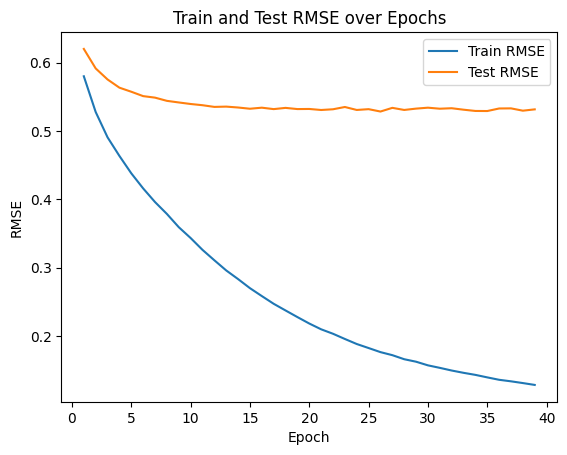

In [53]:
train_rmse_values = []
test_rmse_values = []

for epoch in range(1, 40):
    model = SVDpp(n_epochs=epoch, lr_all=0.025, reg_all=0.03, verbose=False)
    model.fit(trainset)
    
    train_predictions = model.test(trainset.build_testset())
    train_rmse = accuracy.rmse(train_predictions, verbose=False)
    train_rmse_values.append(train_rmse)
    
    test_predictions = model.test(testset)
    test_rmse = accuracy.rmse(test_predictions, verbose=False)
    test_rmse_values.append(test_rmse)
    
epochs = range(1, model.n_epochs + 1)
plt.plot(epochs, train_rmse_values, label='Train RMSE')
plt.plot(epochs, test_rmse_values, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE over Epochs')
plt.legend()
plt.show()

### Slope One

In [46]:
from surprise import SlopeOne

# Start the timer
start_time = time.time()

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

slope_one_model = SlopeOne()

slope_one_model.fit(trainset)

train_prediction = slope_one_model.test(trainset.build_testset())

test_prediction = slope_one_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)

test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

RMSE: 0.1107
RMSE: 0.5811
Train RMSE with Tuned Model: 0.11071587358921507
Test RMSE with Tuned Model: 0.5811011878805571
Elapsed time: 4.594622373580933 seconds


In [61]:
# Start the timer
start_time = time.time()

slope_one_model.fit(trainset)

train_prediction = slope_one_model.test(trainset.build_testset())

test_prediction = slope_one_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)

test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

RMSE: 0.1107
RMSE: 0.5811
Train RMSE with Tuned Model: 0.11071587358921507
Test RMSE with Tuned Model: 0.5811011878805571
Elapsed time: 3.385434865951538 seconds
